# Clustering
Problem Statement :
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present. Our goal is to cluster countries based on numerical features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import kaleido

In [3]:
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44       56.20       5.82    553  
1       4.49       76.30       1.65   4090  
2      16.10       76.50       2.89   4460  
3      22.40       60.10       6.16   3530  
4       1.44       76.80       2.13  12200

In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Comment
country : Name of the country

child_mort : Death of children under 5 years of age per 1000 live births

exports : Exports of goods and services per capita. Given as %age of the GDP per capita

health : Total health spending per capita. Given as %age of GDP per capita

imports : Imports of goods and services per capita. Given as %age of the GDP per capita

Income : Net income per person

Inflation : The measurement of the annual growth rate of the Total GDP

life_expec : The average number of years a newborn child would live if the current mortality patterns are to remain constant throughout the individual's lifetime.

total_fer : The number of children that would be born to each woman if the current age-specific fertility rates remain constant throughout her childbearing years.

gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
data.describe()

child_mort  exports  health  imports    income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00    167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89  17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21  19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07    609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20   3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30   9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75  22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00 125000.00     104.00       82.80   

       total_fer      gdpp  
count     167.00    167.00  
mean        2.95  12964.16  
std         1.51  18328.70  
min         1.15    231.00  
25%         1.79   1330.00  
50%         2.41   4660.00  
75%         3.88  14050.00  
max         7.49 105000.00

## Comment
Here are some interesting insights:
1. child_mort (Child Mortality):
Max: 208 — Extremely high child mortality in some countries indicates a dire need for aid.  
Min: 2.6 — Significantly better health conditions in developed countries.  

2. income (Income per Capita):  
Max: 125,000 — Very high income in some regions.  
Min: 609 — Countries with extremely low income require urgent financial support.  

3. . life_expec (Life Expectancy):  
Max: 82.8 — High standard of living and healthcare.  
Min: 32.1 — Alarmingly low life expectancy signals poor health conditions.  

4. gdpp (GDP per Capita):  
Max: 105,000 — Highly developed economies.  
Min: 231 — Extremely low GDP reflects severe poverty.  

In [6]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


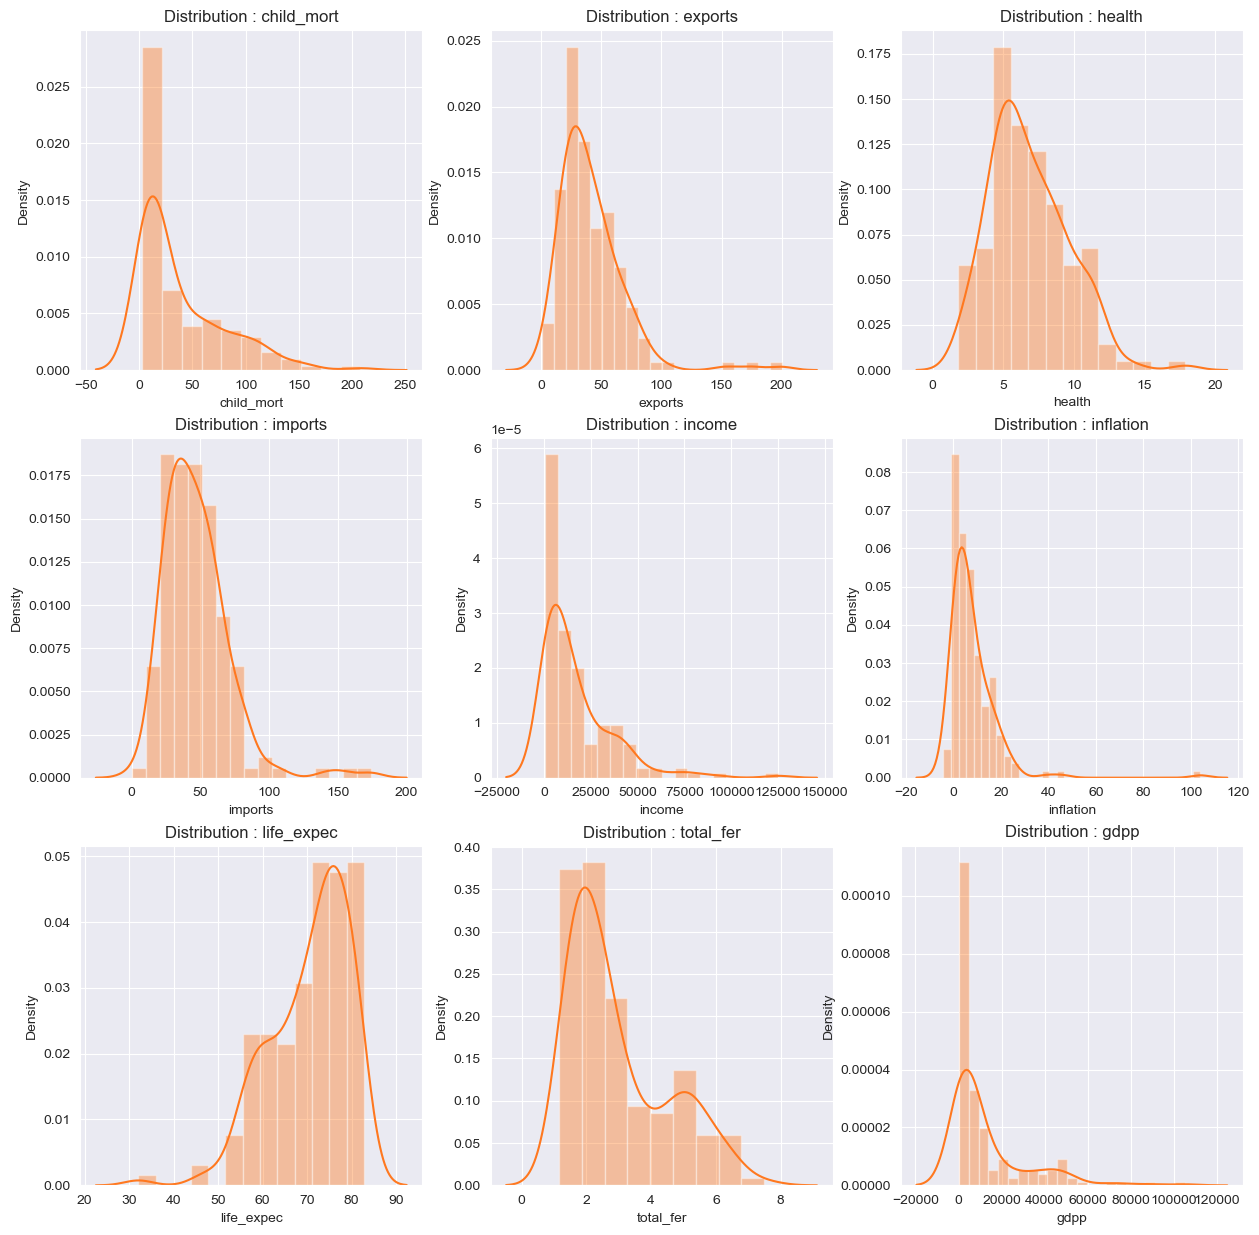

In [8]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

## Comment
Lets take a look on some key insights: 
* life_expec displays a left or negatively skewed data distribution.
* health displays a normally distrubuted data.
* All the remaining features show a right or positively skewed data distribution.
* Data distribution of country is not put out as it has text data and it has the same number of unique values as the length of the dataframe.
* Features of Economically Backward Countries :
* The country's per capita income is very low.
* High Population that leads to non - availability of resources.
* Unemployment due to less resources.
* Low country wealth that leads to low capital.
* Inequitable distribution of wealth and income.
* Lack of proper educational amenities and thus illiteracy prevails.
*Low level of living.
* No technical advancement.
* Poor health services coupled with high birth & death rates.  
HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!

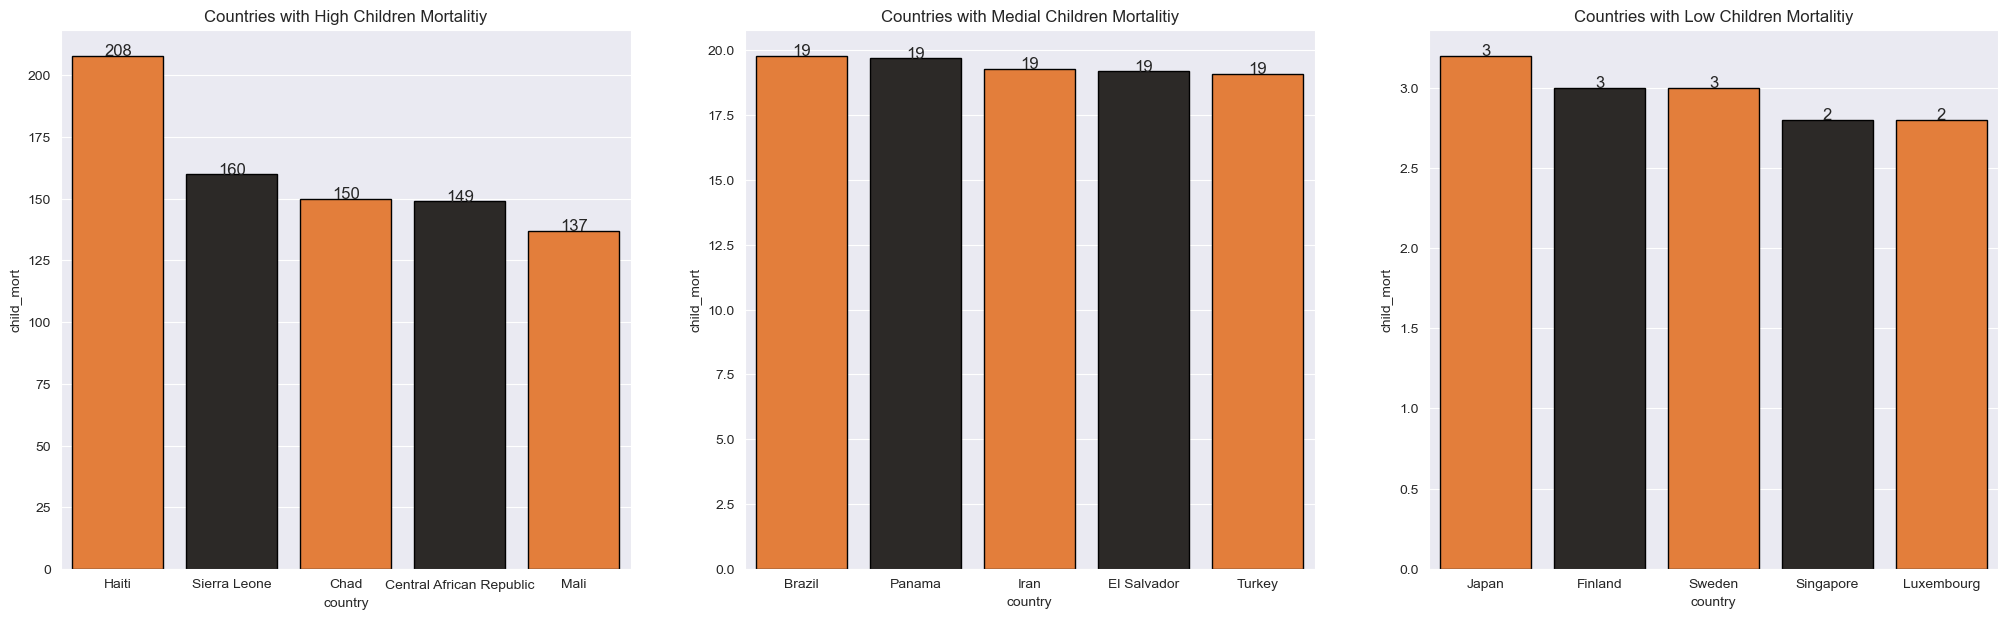

In [10]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

## Comment
Haiti has the highest children's deaths. African countries have significant positions in this statistic. At the other extreme of child_mort, countries from Asia and Europe has some solid presence which is a good sign of being well-developed country.

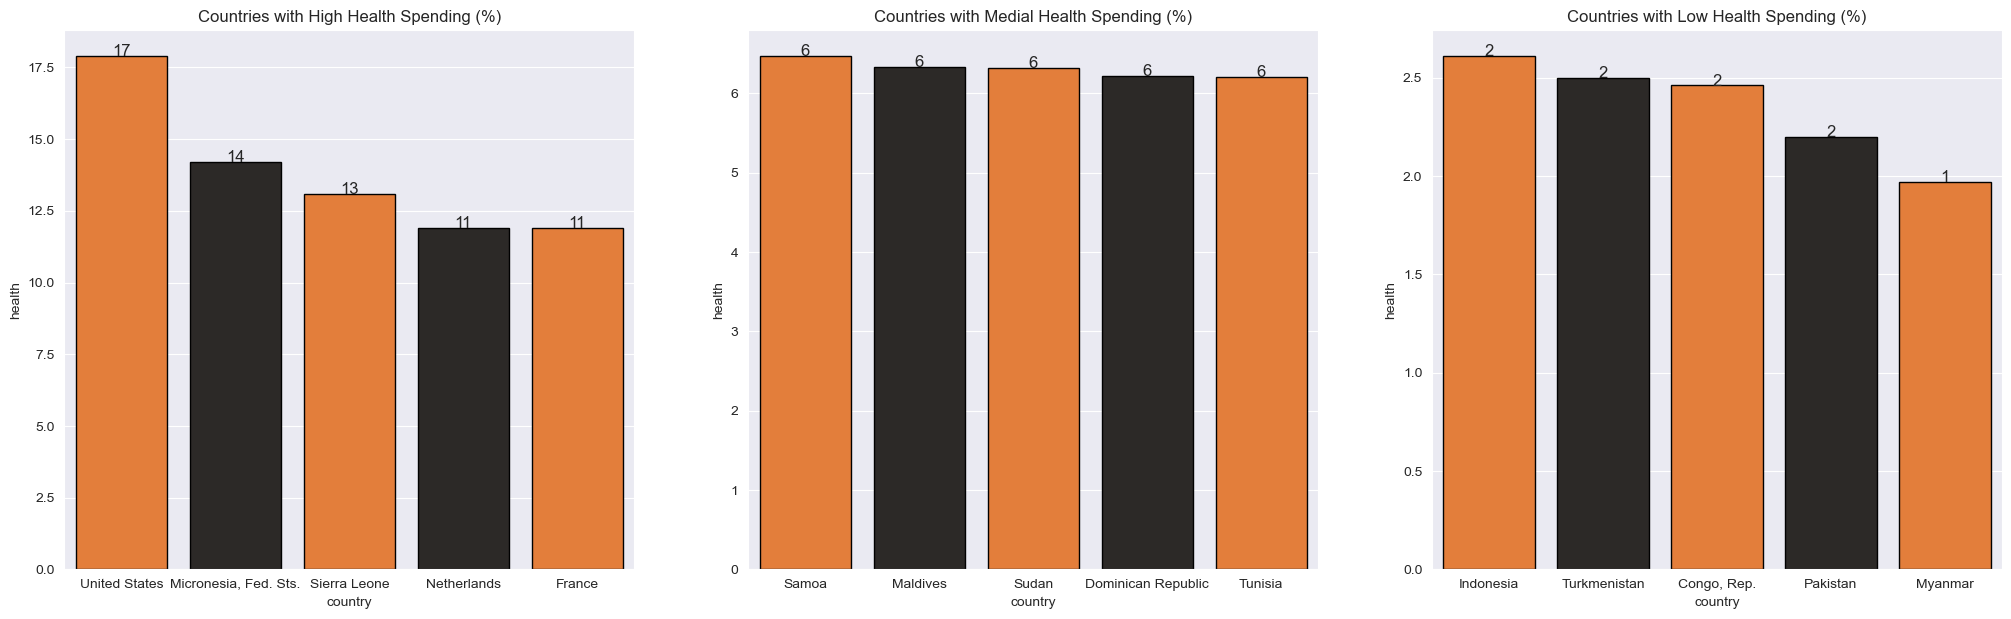

In [11]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

## Comment

US stands at the top when it comes to spending on health with 17% of the individual GDP contribution. 6% seems to be the mean values of the citizens spending on their health. Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.


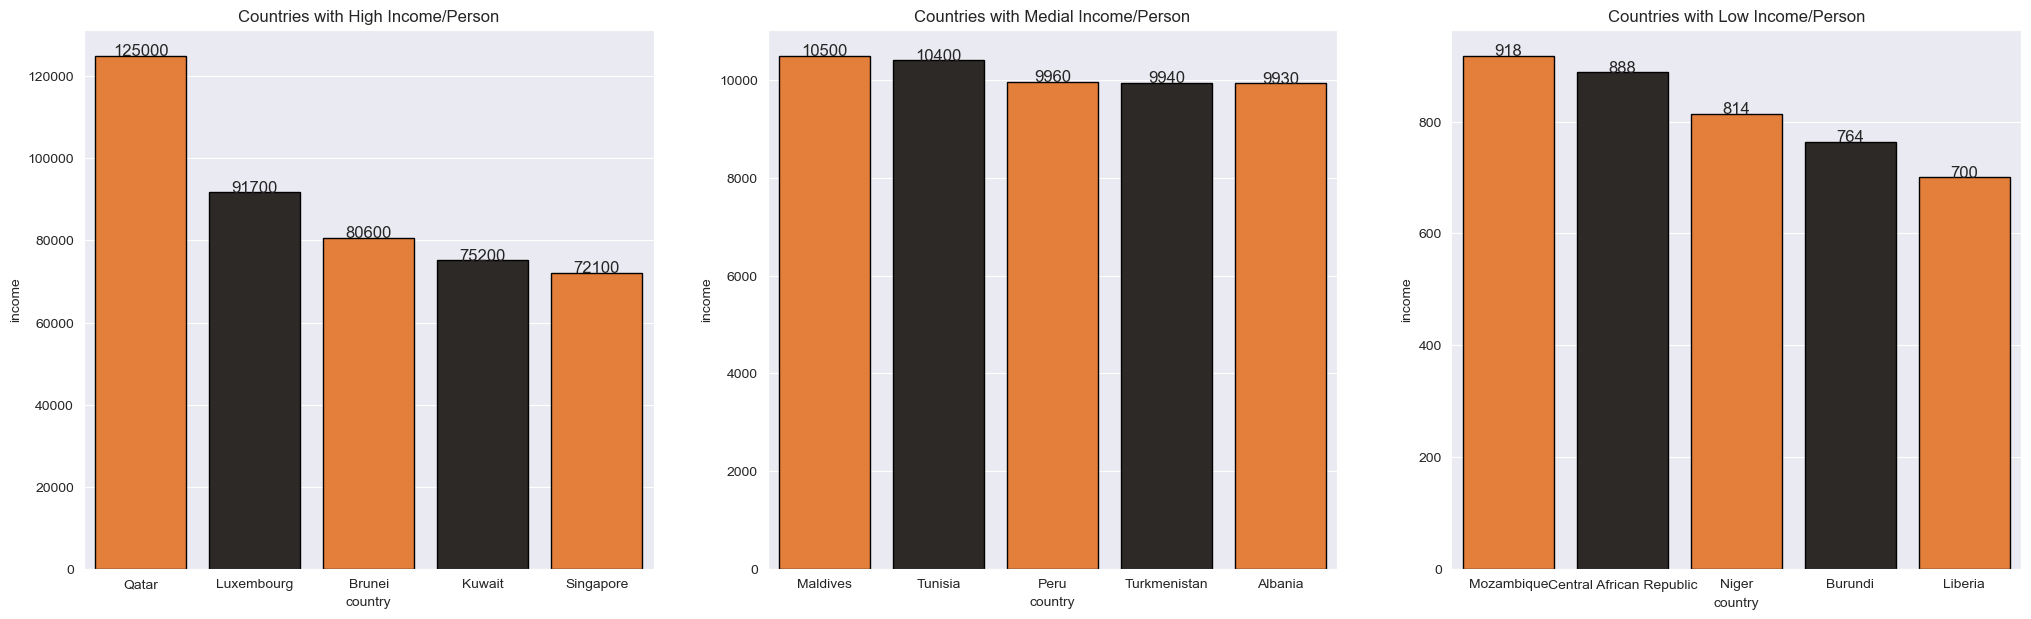

In [12]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

## Comment
Citizens of the Qatar have the highest income out of all the countries with a difference of 30k more than the 2nd placed countries. Singapore & Luxembourg are again present in the top 5 of another feature.
Lower end of the income is dominated by the African nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered.
The difference in the income of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

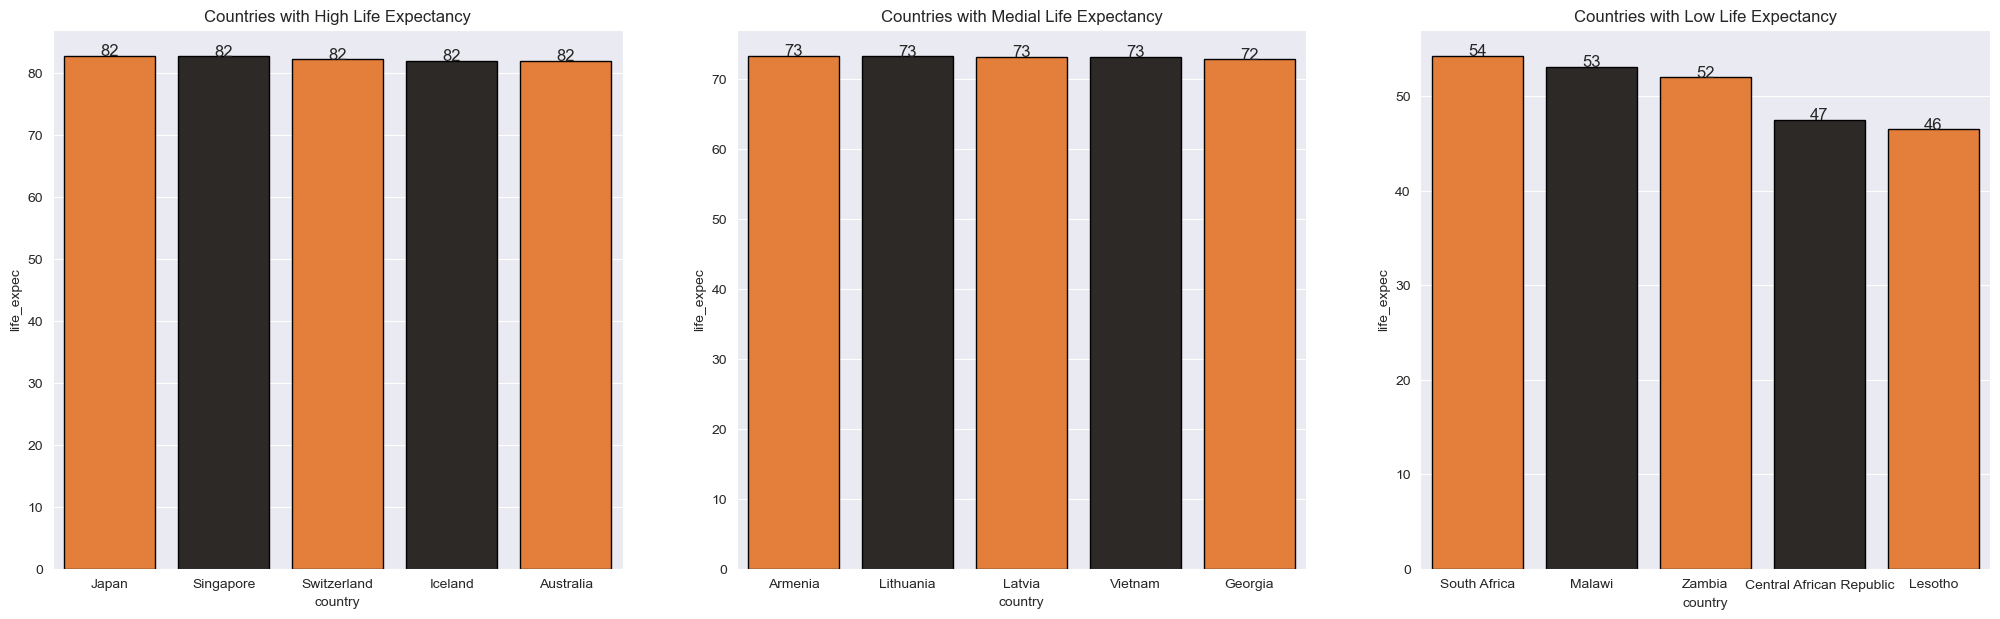

In [13]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

## Comment
life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
African countries are again present in the lower end for another featur

# Feature Engineering

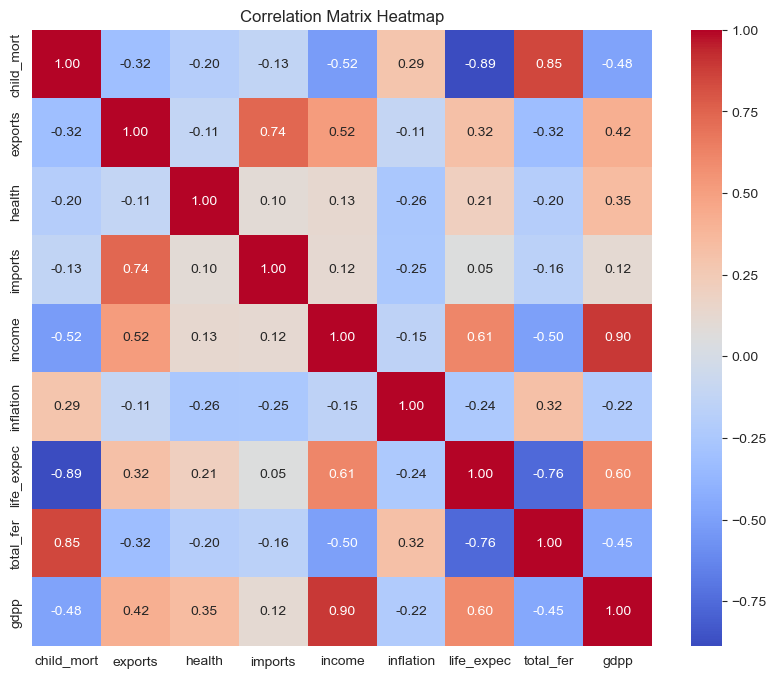

In [14]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

## Comment
Many features have relationships with each other.  
* child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!  
* Rise in exports clearly increases gdpp, income & imports.  
* Spending on health has a small rise in life_expec and also decreases the child_mort.  
* income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.  
* As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.
* According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.  
We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.

The 3 categories of the features are :
* health : child_mort, health, life_expec, total_fer
* trade : imports, exports
* finance : income, inflation, gdpp  


Hence, we will dissolve these features into these categories and normalize them!

In [16]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

Health  Trade  Finance
0    6.24   1.20     1.35
1    3.04   1.72     1.47
2    3.39   1.60     3.17
3    6.47   2.43     3.49
4    2.96   2.36     2.24

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

Country  Health  Trade  Finance
0          Afghanistan    0.63   0.14     0.08
1              Albania    0.13   0.20     0.09
2              Algeria    0.18   0.19     0.21
3               Angola    0.66   0.28     0.24
4  Antigua and Barbuda    0.12   0.28     0.15

## Comment
Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.  
We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.  
Normalization : Health, Trade and Finance features are normalized.  
Standardization : None of the features are standardized for the above data.

In [18]:
df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health')
col.remove('country')
df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True)
df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        0.43     0.05    0.28     0.26    0.01       0.13        0.48   
1        0.07     0.14   -0.10     0.28    0.07       0.08        0.87   
2        0.12     0.19   -0.97     0.18    0.10       0.19        0.88   
3        0.57     0.31   -1.45     0.25    0.04       0.25        0.55   
4        0.04     0.23   -0.29     0.34    0.15       0.05        0.88   

   total_fer  gdpp  
0       0.74  0.00  
1       0.08  0.04  
2       0.27  0.04  
3       0.79  0.03  
4       0.15  0.11

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

## Comment
These are the variance values of the each feature present in the dataset.

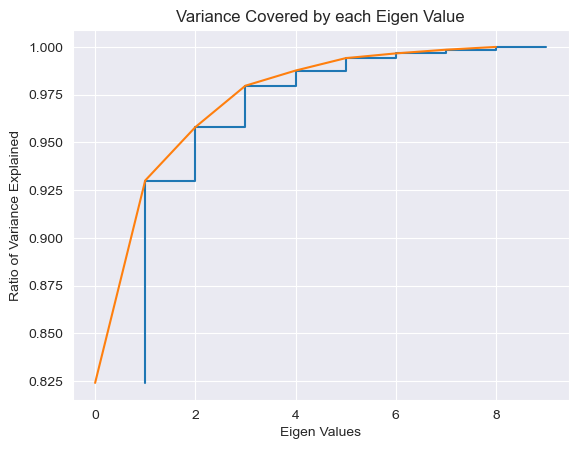

In [21]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

## Comment
This is a very effective method where we add up the variances of all the features in cummulative format.
Typically eigen values with more than 95% of ratio of variance are selected.
They correspond to the columns of the PCA generated dataframe.
In this case, we select the Eigen Value : 2 as the steps generated have significant variances and thus the other features get dominated by their variances.

In [22]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

0     1     2
0  0.22  0.64  0.09
1 -0.08 -0.17 -0.21
2 -0.96 -0.13 -0.13
3 -1.51  0.47  0.28
4 -0.26 -0.24 -0.06

# Modeling

In [23]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

# Comment
First, we are going to use K-Means Clustering.  
K-Means Clustering is a distance based algorithm that is used for unsupervised learning that does not support categorical features.

* It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters the in data but with a mathematical approach :
* Selects 2 (assume k = 2) centroids randomly.
* Distance between the centroids and all the data points are calculated.
* If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
* For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
* This process repeats until both centroids converge to fixed points.

We also have k hyperparameter - It defines the number of clusters or groups the data is to be divided into. For the selection of values of k, we use 2 statistical tests :
1. Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
2. Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.


### Now we are clustering for the Combination: Health - Trade - Finance

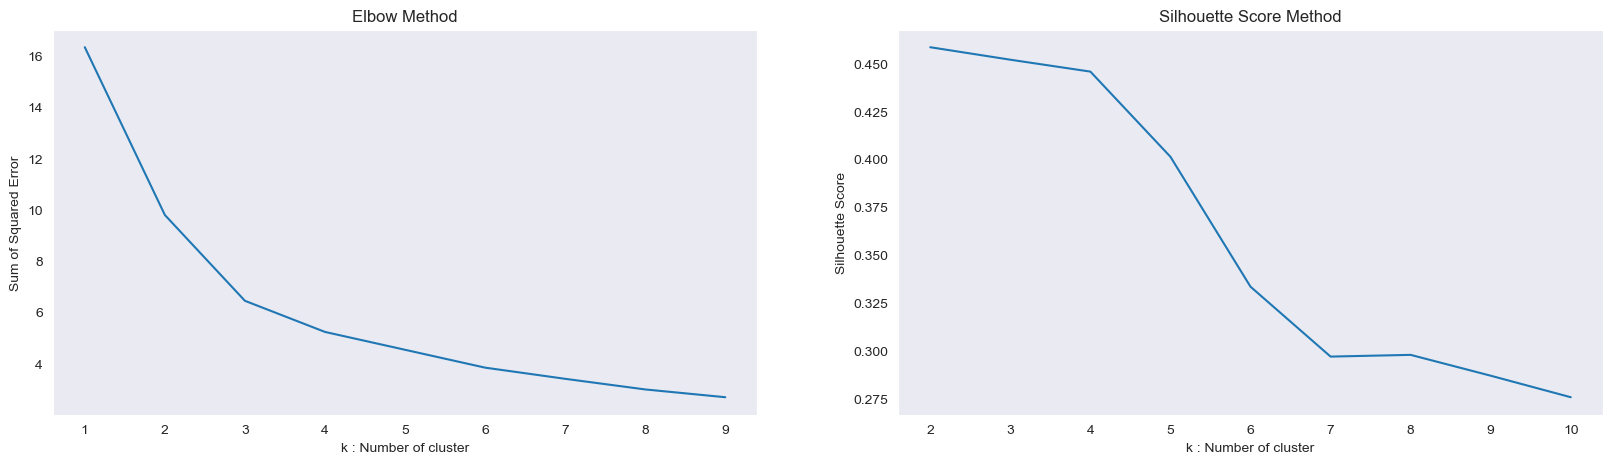

In [24]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ 
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

So we are choosing the best one: k: Clusters=3

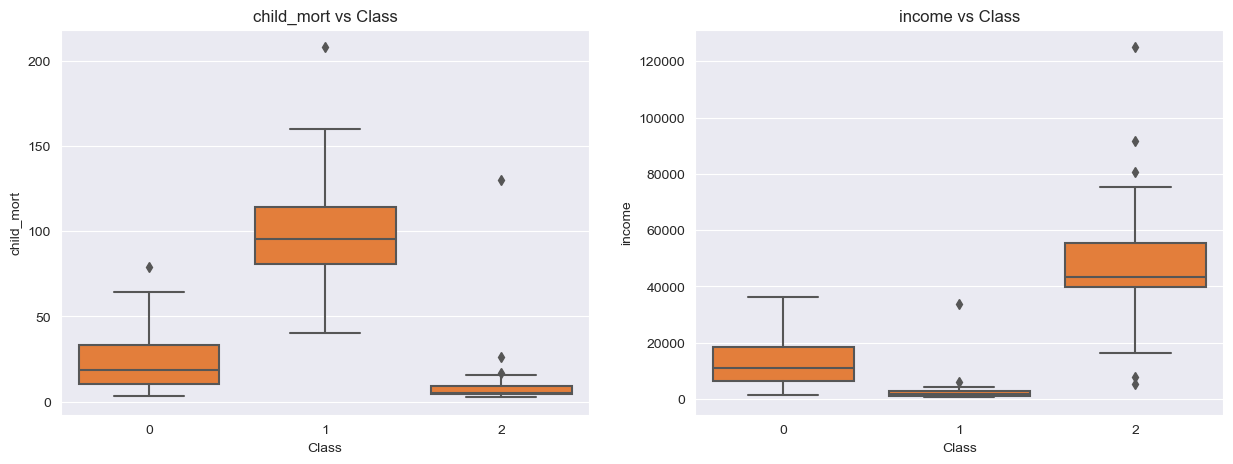

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

## Comment
From the above plot we can conclude :  
0 : No Help Needed  
1 : Help Needed  
2 : Might Need Help  

In [27]:
import plotly.express as px
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; df1['Class'] = labels
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'No Help Needed':'Green',
                                          'Might Need Help':'Yellow'}
                    )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## Comment

Based on the Health, Trade, and Finance indicators, it is clear that African countries, especially in central Africa, are in the greatest need of assistance. Afghanistan and Pakistan also require significant support. The clustering into "Help Needed" appears accurate.

Interestingly, countries with strong economies like the USA, Germany, and Norway are labeled as "low need for help", likely due to low child mortality and declining birth rates. This analysis highlights the disparity between developed and developing nations and can help HELP International prioritize aid where it is most needed.

### PCA Data

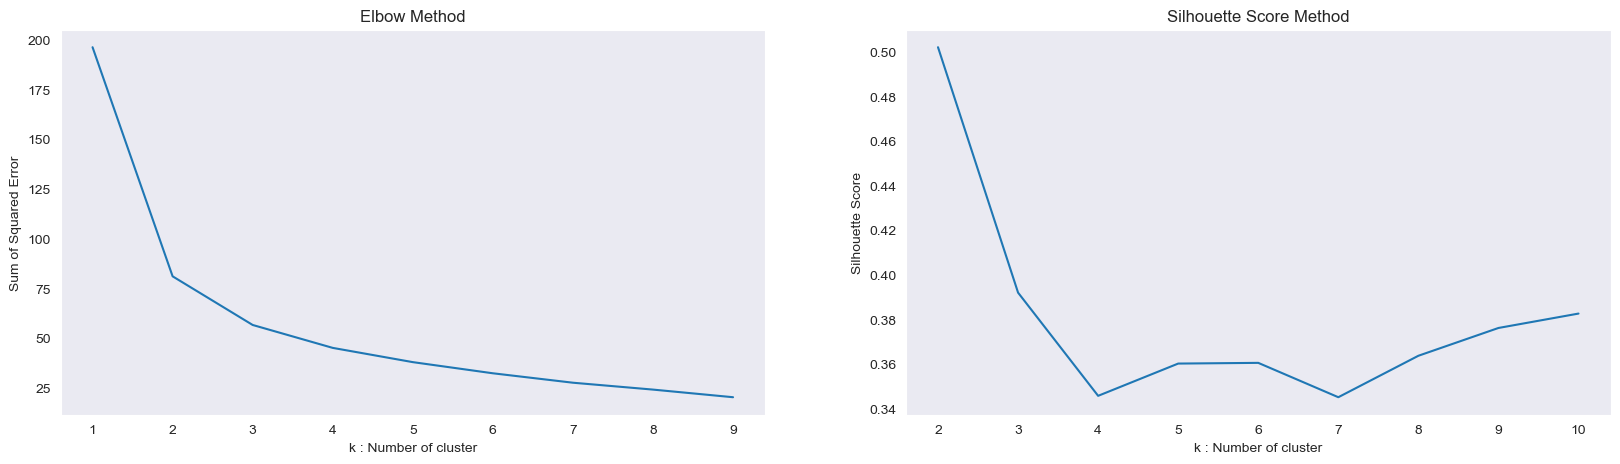

In [28]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

From the results of the above 2 methods, we select :
k : Clusters = 3

In [30]:
model = KMeans(n_clusters = 2,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; pca_df2['Class'] = labels



### Note
We know that low income and high child mortality is a sign of an economically backward nation.

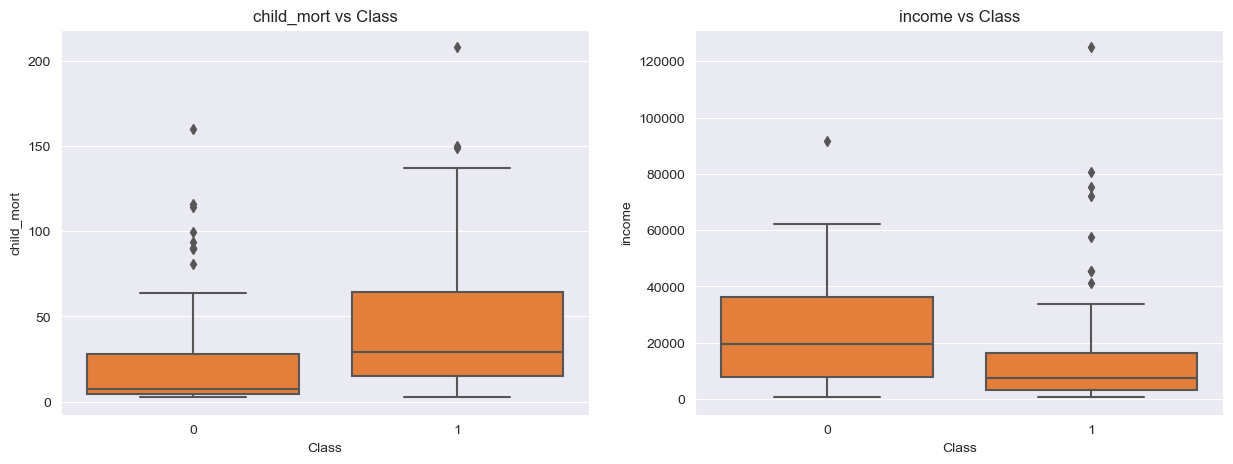

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

From the above plot we can conclude :  
0 : No help needed  
1 : Help Needed

In [32]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'No help needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## Comment
The purple regions represent countries where help is needed, primarily concentrated in Africa, parts of Asia, and South America. Central Africa and the Middle East, including Afghanistan, stand out as areas requiring significant support. On the other hand, green regions indicate countries that do not need help, including developed nations like the United States, Canada, Australia, and most of Europe. This suggests that stronger economies generally correlate with "no help needed," while regions facing economic challenges, political instability, or social issues are more likely to be classified under "Help needed."  

### DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised learning algorithm that groups data points based on density rather than predefined cluster shapes, solving some limitations of K-Means.  
How DBSCAN Works:
1. Start with a random point.
2. Check the number of data points within ε:
 * If ≥ minPts: It becomes a core point, forming a cluster.
 * If not: It is non-core or an outlier.
3. Expand the cluster by recursively checking neighboring points:
 * Add points within ε of core points.
4. Repeat until all points are processed.
5. Noise points remain unclustered.

I am going to use DBSCAN only for feature combination : Health - Trade - Finance

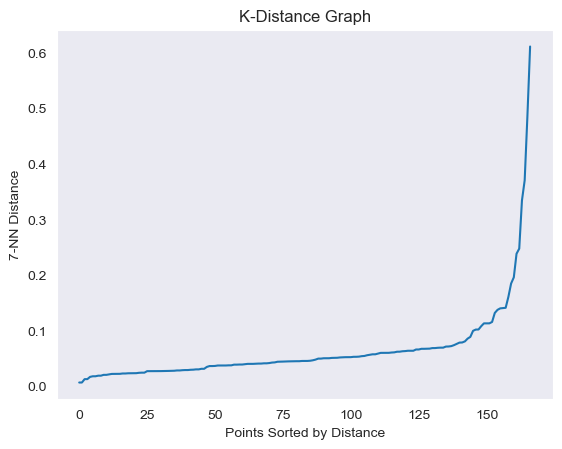

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

## Comment
We select minPts = 8 i.e >= 2 * 3 features  
The value assigned to the n_neighbors : minPts - 1.  
From the graph above, we select : eps - 0.08

In [34]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


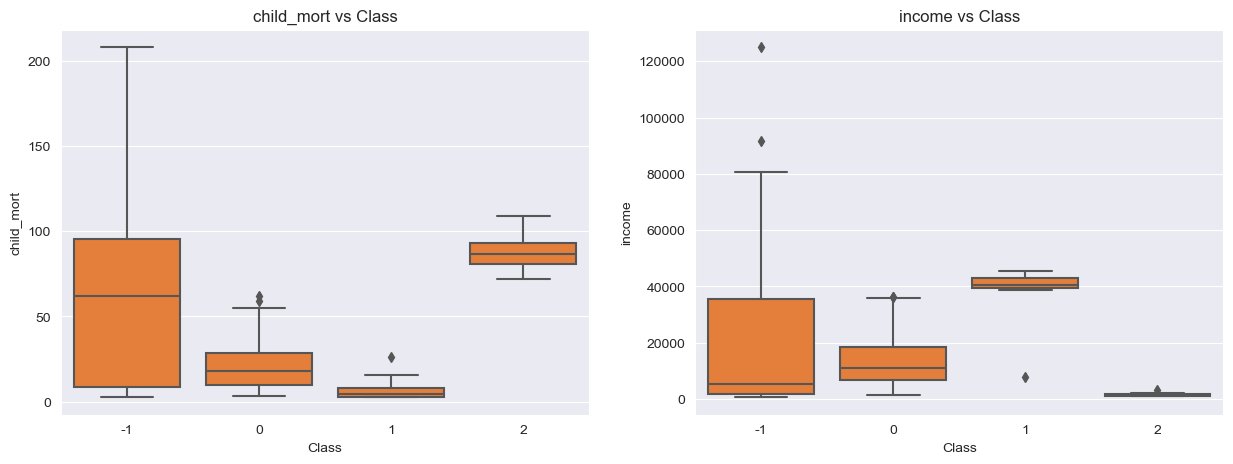

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

## Comment
By rule -1 is associated with Noise / Outliers!  
From the above plot we can conclude :  
-1 : Noise / Outliers  
0 : Might Need Help  
1 : No Help Needed  
2 : Help Needed  

In [35]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## Comment
We can see a significant number of countries are classified as noise or outliers because the algorithm relies on density-based grouping, and many countries may not meet the minimum number of points (minPts) required within the defined radius (epsilon). Countries with unique or sparse characteristics, such as small populations, isolated geographic locations, or extreme values in features like child mortality or income, are unlikely to form dense clusters. As a result, DBSCAN treats them as noise, as they do not fit into any of the identified clusters. This outcome highlights the challenge of using DBSCAN for global data, where the distribution of features is highly uneven and some regions inherently lack sufficient density to form clusters.